## Assignment 7: Topic Modelling

Group: Group 2

### Part 1: Loading and Cleaning Twitter Data

1. Import the necessary libraries.

In [1]:
import warnings                    # ignore warnings
warnings.filterwarnings('ignore')
import langdetect                  # language detection
import matplotlib.pyplot           # plotting
%matplotlib inline
import nltk                        # natural language processing

# installing specific word dictionarys used for stopword removal and lemmatization
nltk.download('wordnet')
nltk.download('stopwords')

import numpy                       # arrays and matrics
import pandas                      # dataframes
import pyLDAvis                    # plotting
import pyLDAvis.sklearn            # plotting
import regex                       # regular expressions
import sklearn                     # machine learning

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jacks\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jacks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\sklearn\decomposition\_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


2. Load the LA Times health Twitter data (latimeshealth.txt) from the dropbox for this assignment.

In [2]:
# load the LA Times health Twitter data 
df = pandas.read_csv('latimeshealth.txt', sep="|", header=None)
df.columns = ["id", "datetime", "tweettext"]

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3. Run a quick exploratory analysis to ascertain data size and structure. Comment on your findings.

In [3]:
# define quick look function for data frame
def dataframe_quick_look(df, nrows):
    print("SHAPE:\n{shape}\n".format(shape=df.shape))
    print("COLUMN NAMES:\n{names}\n".format(names=df.columns))
    print("HEAD:\n{head}\n".format(head=df.head(nrows)))

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
dataframe_quick_look(df, nrows=5)

SHAPE:
(4171, 3)

COLUMN NAMES:
Index(['id', 'datetime', 'tweettext'], dtype='object')

HEAD:
                   id                        datetime  \
0  576760256031682561  Sat Mar 14 15:02:15 +0000 2015   
1  576715414811471872  Sat Mar 14 12:04:04 +0000 2015   
2  576438353555365888  Fri Mar 13 17:43:07 +0000 2015   
3  576438347003908096  Fri Mar 13 17:43:06 +0000 2015   
4  576413058177712128  Fri Mar 13 16:02:36 +0000 2015   

                                           tweettext  
0  Five new running shoes that aim to go the extr...  
1  Gym Rat: Disq class at Crunch is intense worko...  
2  Noshing through thousands of ideas at Natural ...  
3  Natural Products Expo also explores beauty, su...  
4  Free Fitness Weekends in South Bay beach citie...  



C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Comments:**<br>
The dataset has 4,171 rows and 3 columns. The three columns are 'id', 'datetime', and 'tweettext'. The data type is an object. As we can see from the above data, the id is 18 digits. The data time column includes the day, date, time, and year of the twitter comment. The tweet text contains the tweet text for that comment.  

4. Extract the tweet text and convert it to a list object. Determine the length and print out the first five elements.

In [5]:
# convert tweet text to a list object
raw = df['tweettext'].tolist()

# print out the first five elements
print("HEADLINES:\n{lines}\n".format(lines=raw[:5]))

# determine the length
print("LENGTH:\n{length}\n".format(length=len(raw)))

HEADLINES:
['Five new running shoes that aim to go the extra mile http://lat.ms/1ELp3wU', 'Gym Rat: Disq class at Crunch is intense workout on pulley system http://lat.ms/1EKOFdr', 'Noshing through thousands of ideas at Natural Products Expo West http://lat.ms/1EHqywg', 'Natural Products Expo also explores beauty, supplements and more http://lat.ms/1EHqyfE', 'Free Fitness Weekends in South Bay beach cities aim to spark activity http://lat.ms/1EH3SMC']

LENGTH:
4171



C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5. Write a function to perform language detection and tokenization on white spaces, and then replace the screen names and URLs with SCREENNAME and URL, respectively. The function should also remove punctuation, numbers, and the SCREENNAME and URL replacements. Convert everything to lowercase, except SCREENNAME and URL. It should remove all stop words, perform lemmatization, and keep words with five or more letters only.  Be sure to add comments to the code.

In [6]:
# use the langdetect library to detect the language of each tweet
def do_language_identifying(txt):
    try: the_language = langdetect.detect(txt)
    except: the_language = 'none'
    return the_language

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# test the function with the first tweet comment
print("DETECTED LANGUAGE:\n{lang}\n".format(lang=do_language_identifying(raw[0])))

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DETECTED LANGUAGE:
en



In [8]:
# define function to perform lemmatization
# uses wordnet dictionary previously loaded
def do_lemmatizing(wrd):
    out = nltk.corpus.wordnet.morphy(wrd)
    return (wrd if out is None else out)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# define consolidated data cleaning function

def do_tweet_cleaning(txt):
    # identify language of tweet
    # return null if language not english
    lg = do_language_identifying(txt)
    if lg != 'en':
        return None
    
    # split the string on whitespace
    out = txt.split(" ")
    
    # replace screen names with SCREENNAME
    out = ['SCREENNAME' if i.startswith('@') else i for i in out]
    
    # replace urls with URL
    out = ['URL' if bool(regex.search("http[s]?://", i)) else i for i in out]
    
    # remove all punctuation
    out = [regex.sub("[^\\w\\s]|\n", "", i) for i in out]
    
    # remove all numerics
    out = [regex.sub("^[0-9]*$", "", i) for i in out]
    
    # make all non-keywords lowercase
    out = [i.lower() if i not in ['SCREENNAME', 'URL'] else i for i in out]
    
    # remove SCREENNAME and URL
    out = [i for i in out if i not in ['SCREENNAME', 'URL']]
    
    # remove stopwords
    list_stop_words = nltk.corpus.stopwords.words("english")
    list_stop_words = [regex.sub("[^\\w\\s]", "", i) for i in list_stop_words]
    
    out = [i for i in out if i not in list_stop_words]
    
    # lemmatizing
    out = [do_lemmatizing(i) for i in out]
    
    # keep words 5 or more characters long
    out = [i for i in out if len(i) >= 5]
    
    # print '.' to indicate the function is still running
    print(".", end = "")
    
    return out

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6. Apply the function defined in Step 5 to every tweet. Determine the length and print out the first five lines.

In [10]:
# apply the clearning function to every tweet
clean = list(map(do_tweet_cleaning, raw))

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [11]:
# print the first five clean lines
print("HEADLINES:\n{lines}\n".format(lines=clean[:5]))

# print the length of the first five clean lines
print("LENGTH:\n{length}\n".format(length=len(clean)))

HEADLINES:
[['running', 'shoes', 'extra'], ['class', 'crunch', 'intense', 'workout', 'pulley', 'system'], ['thousand', 'natural', 'product'], ['natural', 'product', 'explore', 'beauty', 'supplement'], ['fitness', 'weekend', 'south', 'beach', 'spark', 'activity']]

LENGTH:
4171



C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7. Remove elements of the output list equal to None.

In [12]:
# remove none types
clean = list(filter(None.__ne__, clean))

# print the first five clean lines
print("HEADLINES:\n{lines}\n".format(lines=clean[:5]))

# print the length of the first five clean lines
print("LENGTH:\n{length}\n".format(length=len(clean)))

HEADLINES:
[['running', 'shoes', 'extra'], ['class', 'crunch', 'intense', 'workout', 'pulley', 'system'], ['thousand', 'natural', 'product'], ['natural', 'product', 'explore', 'beauty', 'supplement'], ['fitness', 'weekend', 'south', 'beach', 'spark', 'activity']]

LENGTH:
4097



C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8. Turn the elements of each tweet back into a string. Concatenate using white space. Determine the length and print out the first 10 lines.

In [13]:
# turn tokens back into string, concatenate with white spaces
clean_sentences = [" ".join(i) for i in clean]

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# print out the first 10 lines

print(clean_sentences[:10])

['running shoes extra', 'class crunch intense workout pulley system', 'thousand natural product', 'natural product explore beauty supplement', 'fitness weekend south beach spark activity', 'kayla harrison sacrifice', 'sonic treatment alzheimers disease', 'ultrasound brain restore memory alzheimers needle onlyso farin mouse', 'apple researchkit really medical research', 'warning chantix drink taking might remember']


C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# determine the lenght
print("LENGTH:\n{length}\n".format(length=len(clean_sentences)))

LENGTH:
4097



C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Part 2: Latent Dirichlet Allocation (LDA) and Health Tweets

1. Specify the number_words, number_docs, and number_features variables.

In [16]:
number_words = 10
number_docs = 10
number_features = 1000

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2. Describe the following hyperparameters:max_df, min_df, max_features.

The hyperparameters max_df, min_df, and max_features help filter the number of words in the corpus to the one that has more influence on the model. Words that appear in too many documents may not be good to specify a topic. The max_df is a float number between 0.0 and 1.0. It represents the percentage of documents so it helps to throw away words that appear in more than the specified proportion of documents. Considering the fact that some words are less likely to be attributable to a topic when they only appear in a few documents. The min_df helps ignore words that have a document frequency lower than the specified number of documents. The max_features help prevents overfit of the model training. It specifies the number of words that are used to fit the model. 

3. Create a bag-of-words model and assign the feature names to another variable for use later on.

In [17]:
vectorizer1 = sklearn.feature_extraction.text.CountVectorizer(analyzer="word", \
                                                                max_df=0.95, \
                                                                min_df=10, \
                                                                max_features=number_features)

clean_vec1 = vectorizer1.fit_transform(clean_sentences)
print(clean_vec1[0])
feature_names_vec1 = vectorizer1.get_feature_names()
print(feature_names_vec1)

  (0, 319)	1
['abortion', 'accord', 'active', 'activity', 'actually', 'addiction', 'adult', 'advice', 'affect', 'aging', 'alcohol', 'allergy', 'already', 'alzheimers', 'america', 'american', 'among', 'animal', 'another', 'answer', 'antibiotic', 'appear', 'approve', 'around', 'athlete', 'attack', 'autism', 'average', 'avoid', 'bacteria', 'balance', 'beach', 'become', 'believe', 'benefit', 'better', 'binge', 'birth', 'black', 'blood', 'boost', 'brain', 'break', 'breast', 'bring', 'calif', 'california', 'calorie', 'campaign', 'cancer', 'cause', 'center', 'challenge', 'chance', 'change', 'check', 'child', 'childhood', 'chocolate', 'choice', 'chronic', 'cigarette', 'claim', 'class', 'clean', 'clinical', 'coffee', 'college', 'coming', 'common', 'company', 'concussion', 'confirm', 'consider', 'consumer', 'continue', 'control', 'costs', 'could', 'count', 'country', 'county', 'court', 'coverage', 'create', 'crunch', 'daily', 'dangerous', 'deadly', 'death', 'debate', 'decision', 'decline', 'dela

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4. Identify the optimal number of topics by trying different numbers and outputting the perplexity for each.

In [18]:
# define a function that fits an LDA model on various numbers of topics and computes the perplexity score

def perplexity_by_ntopic(data, ntopics):
    output_dict = {"Number Of Topics": [], "Perplexity Score": []}
    for t in ntopics:
        lda = sklearn.decomposition.LatentDirichletAllocation(n_components=t, learning_method="online", random_state=0)
        lda.fit(data)
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
        output_df = pandas.DataFrame(output_dict)
        index_min_perplexity = output_df["Perplexity Score"].idxmin()
        output_num_topics = output_df.loc[
            index_min_perplexity, # index
            "Number Of Topics" # column
            ]
    return (output_df, output_num_topics)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# execute function on vector of numbers of topics (2 to 20)

df_perplexity, optimal_num_topics = perplexity_by_ntopic(clean_vec1, ntopics=[i for i in range(1, 21) if i % 2 == 0])
print(df_perplexity)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Number Of Topics  Perplexity Score
0                 2        349.169657
1                 4        409.690522
2                 6        445.692225
3                 8        467.310653
4                10        477.820276
5                12        499.970003
6                14        512.861434
7                16        523.650366
8                18        539.307724
9                20        541.267599


C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


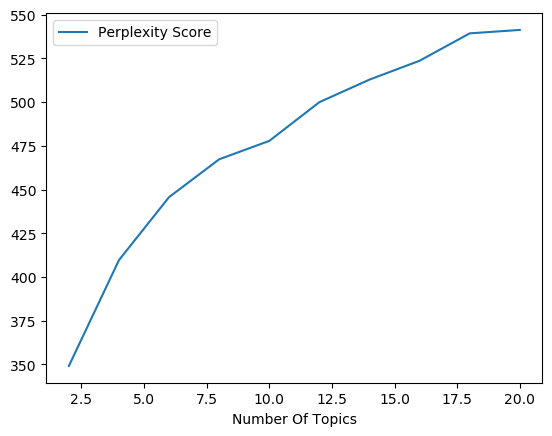

In [20]:
# plot the perplexity scores 
df_perplexity.plot.line("Number Of Topics", "Perplexity Score")

As the DataFrame and the above plot shows, the optimal number of topics using perplexity is two. So we can set the n_components of LDA model equal to two.

5. Fit the LDA model using the optimal number of topics.

In [21]:
# fit an LDA model using the optimal number of topics

lda = sklearn.decomposition.LatentDirichletAllocation(n_components=optimal_num_topics, learning_method="online", random_state=0)
lda.fit(clean_vec1)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

6. Create and print the word-topic table.

In [22]:
# define function to reformat output matrices into easily readable tables

def get_topics(mod, vec, names, docs, ndocs, nwords):
    # word to topic matrix
    W = mod.components_
    W_norm = W / W.sum(axis=1)[:, numpy.newaxis]
    # topic to document matrix
    H = mod.transform(vec)
    
    W_dict = {}
    H_dict = {}
    
    for tpc_idx, tpc_val in enumerate(W_norm):
        topic = "Topic{}".format(tpc_idx)
        
        # formatting w
        W_indices = tpc_val.argsort()[::-1][:nwords]
        W_names_values = [
            (round(tpc_val[j], 4), names[j]) 
            for j in W_indices
        ]
        W_dict[topic] = W_names_values
        
        # formatting h
        H_indices = H[:, tpc_idx].argsort()[::-1][:ndocs]
        H_names_values = [
            (round(H[:, tpc_idx][j], 4), docs[j]) 
            for j in H_indices
        ]
        H_dict[topic] = H_names_values
        
    W_df = pandas.DataFrame(
        W_dict, 
        index=["Word" + str(i) for i in range(nwords)]
    )
    H_df = pandas.DataFrame(
        H_dict,
        index=["Doc" + str(i) for i in range(ndocs)]
    )
        
    return (W_df, H_df)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# run function to get a readable table

W_df, H_df = get_topics(
    mod=lda,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# print word-topic table
print(W_df)

                  Topic0                Topic1
Word0    (0.0752, study)      (0.0438, latfit)
Word1   (0.0278, cancer)      (0.0351, health)
Word2  (0.0274, company)      (0.0163, report)
Word3   (0.0266, coming)  (0.0153, healthcare)
Word4   (0.0218, people)      (0.0152, weight)
Word5  (0.0199, patient)  (0.0147, california)
Word6    (0.0182, could)    (0.0144, american)
Word7    (0.0157, death)      (0.0124, expert)
Word8  (0.0155, obesity)      (0.0109, better)
Word9    (0.0151, heart)       (0.0108, years)


C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7. Print the document-topic table.

In [25]:
# print document-topic table

print(H_df)

                                                 Topic0  \
Doc0  (0.9496, If you have 2 parents with Alzheimer'...   
Doc1  (0.9447, One risk of FDA's trans fat ban: "We ...   
Doc2  (0.9443, Does your dog know how you're feeling...   
Doc3  (0.944, Eating disorders can be hard to spot i...   
Doc4  (0.9439, #LATFit done and DONE! RT @brigettebr...   
Doc5  (0.9436, The Supreme Court ruled this week tha...   
Doc6  (0.9432, Does laziness make people fat? New re...   
Doc7  (0.9419, Troubling link between bisphenols pre...   
Doc8  (0.9384, RT @annagorman: A majority of Califor...   
Doc9  (0.9376, Supplements to boost "low T" increase...   

                                                 Topic1  
Doc0  (0.9373, Drop-jump test, triple-hop stability ...  
Doc1  (0.9372, RT @latimesscience: What happens to y...  
Doc2  (0.9336, Hey #LATFit nation: @GetHealthQuote a...  
Doc3  (0.932, Workouts without pain: Three trainers ...  
Doc4  (0.9285, Using a hands-free phone doesn't make...  
Do

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8. Create a biplot visualization. Discuss the results of the model. Do these word groupings make sense?

In [26]:
# run and display pyLDAvis
lda_plot = pyLDAvis.sklearn.prepare(lda, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda_plot)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Comments:**<br>
When we click on each topic circle or click the Next Topic button, we can view the top words related to that topic. As we can see, the first topic is related to more on the study topic. As we can see some words such as death, heart, cancer, people, obesity and so on are related to health study topics and it makes sense. However, there are words such as coming, could, and company are not making sense for this health study topic. For the second, the first word is the latest. But the words below are health, report, healthcare, weight, and so on. The second topic is more likely to be a health topic. It does not really make sense when 'latfit' is the top one word of the second topic. But when doing some research online, we found that latfit is a word related to exercise so it makes sense to have latfit topic for the second topic.

### Part 3: Non-negative Matrix Factorization (NMF)

1. Create the appropriate bag-of-words model and output the feature names as another variable.

In [27]:
# create a bag-of-words model using TF-IDF
vectorizer2 = sklearn.feature_extraction.text.TfidfVectorizer(analyzer="word", max_df=0.95, min_df=10, max_features=number_features, smooth_idf=False)
clean_vec2 = vectorizer2.fit_transform(clean_sentences)
print(clean_vec2[0])

  (0, 319)	1.0


C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# return the feature names
feature_names_vec2 = vectorizer2.get_feature_names()
feature_names_vec2

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['abortion',
 'accord',
 'active',
 'activity',
 'actually',
 'addiction',
 'adult',
 'advice',
 'affect',
 'aging',
 'alcohol',
 'allergy',
 'already',
 'alzheimers',
 'america',
 'american',
 'among',
 'animal',
 'another',
 'answer',
 'antibiotic',
 'appear',
 'approve',
 'around',
 'athlete',
 'attack',
 'autism',
 'average',
 'avoid',
 'bacteria',
 'balance',
 'beach',
 'become',
 'believe',
 'benefit',
 'better',
 'binge',
 'birth',
 'black',
 'blood',
 'boost',
 'brain',
 'break',
 'breast',
 'bring',
 'calif',
 'california',
 'calorie',
 'campaign',
 'cancer',
 'cause',
 'center',
 'challenge',
 'chance',
 'change',
 'check',
 'child',
 'childhood',
 'chocolate',
 'choice',
 'chronic',
 'cigarette',
 'claim',
 'class',
 'clean',
 'clinical',
 'coffee',
 'college',
 'coming',
 'common',
 'company',
 'concussion',
 'confirm',
 'consider',
 'consumer',
 'continue',
 'control',
 'costs',
 'could',
 'count',
 'country',
 'county',
 'court',
 'coverage',
 'create',
 'crunch',
 'daily

2. Define and fit the NMF algorithm using the number of topics (n_components) value from Part 2.

In [29]:
# define the NMF model and call the fit function using the output of the TF-IDF vectorizer
nmf = sklearn.decomposition.NMF(n_components=optimal_num_topics, init="nndsvda", solver="mu", beta_loss="frobenius", random_state=0, alpha=0.1, l1_ratio=0.5)
nmf.fit(clean_vec2)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NMF(alpha=0.1, beta_loss='frobenius', init='nndsvda', l1_ratio=0.5,
    max_iter=200, n_components=2, random_state=0, shuffle=False, solver='mu',
    tol=0.0001, verbose=0)

3. Get the topic-document and word-topic tables. Take a few minutes to explore the word groupings and try to define the abstract topics. Give a quantitative description of the meanings of the word groupings. Do the word groupings make sense? Are the results similar to those produced using LDA?

In [30]:
# run the get_topics function
W_df2, H_df2 = get_topics(mod=nmf, vec=clean_vec2, names=feature_names_vec2, docs=raw, ndocs=number_docs, nwords=number_words)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# print word-topic table
print(W_df2)

                  Topic0               Topic1
Word0    (0.2874, study)     (0.4033, latfit)
Word1   (0.0199, cancer)      (0.0438, steps)
Word2  (0.0183, suggest)      (0.0419, today)
Word3  (0.0176, obesity)   (0.0419, exercise)
Word4   (0.0172, people)    (0.0259, walking)
Word5   (0.0166, weight)  (0.024, healthtips)
Word6     (0.014, brain)     (0.024, workout)
Word7   (0.0138, health)    (0.0234, getting)
Word8    (0.0132, heart)    (0.0189, weekend)
Word9    (0.0126, death)    (0.0173, fitness)


C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# print document-topic table

print(H_df2)

                                                 Topic0  \
Doc0  (0.2419, Study finds link between high fructos...   
Doc1  (0.2419, Couch potatoes and high-intensity run...   
Doc2  (0.2419, The case against funding studies on a...   
Doc3  (0.2419, Which American cities are fittest? ht...   
Doc4  (0.2419, Exposure to light at night may contri...   
Doc5  (0.2419, New documentary "All of Me" explores ...   
Doc6  (0.2419, Early Bird or Night Owl? Blood test r...   
Doc7  (0.2419, Too stressed to exercise? Think again...   
Doc8  (0.2419, The latest health advice: Do NOT shak...   
Doc9  (0.2419, You can tone your glutes, hamstrings ...   

                                                 Topic1  
Doc0  (0.269, So Elton John has "appendix abscess su...  
Doc1  (0.269, Need help getting your kids to bed on ...  
Doc2  (0.269, RT @latimesscience: The Genomics @xpri...  
Doc3  (0.269, Doctors find a simple way to manage hi...  
Doc4  (0.269, Scientists find a way to tell if suppo...  
Do

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
compare = pandas.concat([W_df, W_df2], axis=1)
print(compare)

                  Topic0                Topic1             Topic0  \
Word0    (0.0752, study)      (0.0438, latfit)    (0.2874, study)   
Word1   (0.0278, cancer)      (0.0351, health)   (0.0199, cancer)   
Word2  (0.0274, company)      (0.0163, report)  (0.0183, suggest)   
Word3   (0.0266, coming)  (0.0153, healthcare)  (0.0176, obesity)   
Word4   (0.0218, people)      (0.0152, weight)   (0.0172, people)   
Word5  (0.0199, patient)  (0.0147, california)   (0.0166, weight)   
Word6    (0.0182, could)    (0.0144, american)     (0.014, brain)   
Word7    (0.0157, death)      (0.0124, expert)   (0.0138, health)   
Word8  (0.0155, obesity)      (0.0109, better)    (0.0132, heart)   
Word9    (0.0151, heart)       (0.0108, years)    (0.0126, death)   

                    Topic1  
Word0     (0.4033, latfit)  
Word1      (0.0438, steps)  
Word2      (0.0419, today)  
Word3   (0.0419, exercise)  
Word4    (0.0259, walking)  
Word5  (0.024, healthtips)  
Word6     (0.024, workout)  
Word7   

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Comments:**<br>
The word groupings make sense for both topics. The first one is more likely related to a health study. The second topic is more related to exercise and fitness. The words are related to each other so they both make sense. 

From the comparison above, we found that for topic 0, the first two topics are the same for the two models. The same returned words from topic 0 are study, cancer, people, death, heart, and obesity, so 6 out of 10 words are the same. The same returned words from topic 1 are only latfit. So it does not generate the same output for the second topic. 

4. Adjust the model parameters and rerun Step 3 and Step 4. How do the results change?
The output will be as follows:

In [35]:
# define the NMF model and call the fit function using the output of the TF-IDF vectorizer
nmf2 = sklearn.decomposition.NMF(n_components=optimal_num_topics, init="nndsvda", solver="mu", beta_loss="frobenius", random_state=0, alpha=0.3, l1_ratio=0.3)
nmf2.fit(clean_vec2)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NMF(alpha=0.3, beta_loss='frobenius', init='nndsvda', l1_ratio=0.3,
    max_iter=200, n_components=2, random_state=0, shuffle=False, solver='mu',
    tol=0.0001, verbose=0)

In [36]:
# run the get_topics function
W_df3, H_df3 = get_topics(mod=nmf2, vec=clean_vec2, names=feature_names_vec2, docs=raw, ndocs=number_docs, nwords=number_words)

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# print word-topic table
print(W_df3)

                  Topic0                   Topic1
Word0    (0.3939, study)           (0.46, latfit)
Word1  (0.0232, suggest)          (0.0479, steps)
Word2  (0.0191, obesity)          (0.0448, today)
Word3    (0.019, weight)        (0.044, exercise)
Word4   (0.0185, cancer)        (0.0282, walking)
Word5    (0.017, people)     (0.0254, healthtips)
Word6    (0.0145, brain)        (0.0236, getting)
Word7    (0.0133, teens)        (0.0231, workout)
Word8    (0.0132, heart)        (0.0199, weekend)
Word9    (0.0131, death)  (0.0171, pedometerwars)


C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# print document-topic table
print(H_df3)

                                                 Topic0  \
Doc0  (0.2367, 6,000 women a day hit menopause http:...   
Doc1  (0.2367, The latest health advice: Do NOT shak...   
Doc2  (0.2367, You can tone your glutes, hamstrings ...   
Doc3  (0.2367, New documentary "All of Me" explores ...   
Doc4  (0.2367, Do you work out? So do scientists. Th...   
Doc5  (0.2367, Sugar lovers. The 'right' amt is not ...   
Doc6  (0.2367, L.A. billionaire unveils plan to make...   
Doc7  (0.2367, Nation's obesity problem demands swee...   
Doc8  (0.2367, Breast cancer awareness month is tout...   
Doc9  (0.2367, Couch potatoes and high-intensity run...   

                                                 Topic1  
Doc0  (0.2593, Advocacy group says Long John Silver'...  
Doc1  (0.2593, RT @julie_cart: Prescription for conf...  
Doc2  (0.2593, Cooking with gas? Your meal could com...  
Doc3  (0.2593, So Elton John has "appendix abscess s...  
Doc4  (0.2593, New documentary on obesity follows a ...  
Do

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
compare2 = pandas.concat([W_df, W_df2, W_df3], axis=1)
print(compare2)

                  Topic0                Topic1             Topic0  \
Word0    (0.0752, study)      (0.0438, latfit)    (0.2874, study)   
Word1   (0.0278, cancer)      (0.0351, health)   (0.0199, cancer)   
Word2  (0.0274, company)      (0.0163, report)  (0.0183, suggest)   
Word3   (0.0266, coming)  (0.0153, healthcare)  (0.0176, obesity)   
Word4   (0.0218, people)      (0.0152, weight)   (0.0172, people)   
Word5  (0.0199, patient)  (0.0147, california)   (0.0166, weight)   
Word6    (0.0182, could)    (0.0144, american)     (0.014, brain)   
Word7    (0.0157, death)      (0.0124, expert)   (0.0138, health)   
Word8  (0.0155, obesity)      (0.0109, better)    (0.0132, heart)   
Word9    (0.0151, heart)       (0.0108, years)    (0.0126, death)   

                    Topic1             Topic0                   Topic1  
Word0     (0.4033, latfit)    (0.3939, study)           (0.46, latfit)  
Word1      (0.0438, steps)  (0.0232, suggest)          (0.0479, steps)  
Word2      (0.0419, t

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Comments:**<br>
From the table above, the first topic is more likely related to a health study. The second topic is more related to exercise and fitness again. The words are related to each other so they both make sense. However, for the second topic, there are words such as weekend is less related to workout or exercise topic. 

From the comparison above, we found that all three models return the same first top topic 'study' for topic0 and 'latfit' for topic1. However, it looks like the second model with alpha =0.1 and l1_ratio = 0.5 generate a better performance since the top topics are more related to each other. 